Image Data Shape (284, 50, 50, 1)
Label Data Shape 284
0.8596491228070176
[[12  6]
 [ 2 37]]


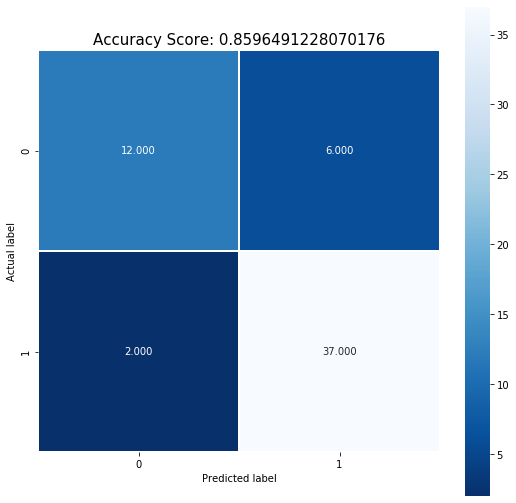

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

X = X/255.0

tam=len(Y)

print("Image Data Shape" , X.shape)
print("Label Data Shape", len(Y))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X.reshape(tam,-1),Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1e5,max_iter=1000)
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
